<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/001(Fashion_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=tf.keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test)= dataset.load_data()
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [6]:
classes=["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

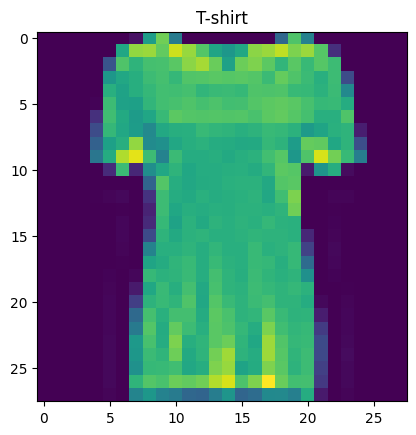

In [9]:
plt.imshow(X_train[10])
plt.title(classes[Y_train[10]])
plt.show()

In [10]:
#Normalizing Data
X_train, X_test =X_train/255, X_test/255

In [15]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(28,28)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=128, activation='relu'),
                           tf.keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7415 - accuracy: 0.7611
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5151 - accuracy: 0.8246
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4702 - accuracy: 0.8379
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4464 - accuracy: 0.8445
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4284 - accuracy: 0.8505
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4142 - accuracy: 0.8553
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4018 - accuracy: 0.8588
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3925 - accuracy: 0.8638
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3835 - accuracy: 0.8671
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.37

In [16]:
#Evaluating Model
test_loss, test_accuracy=model.evaluate(X_test, Y_test)
test_accuracy

313/313 [==============================] - 2s 4ms/step - loss: 0.4146 - accuracy: 0.8511


0.8511000275611877

###Using Adam Optimizer

In [26]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(28,28)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=128, activation='relu'),
                           tf.keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4995 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3729 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3342 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3113 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2939 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2792 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2680 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2568 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2477 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [19]:
#Evaluating Model
test_loss, test_accuracy=model.evaluate(X_test, Y_test)
test_accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8820


0.8820000290870667

####Testing for a single example

1/1 [==============================] - 0s 27ms/step


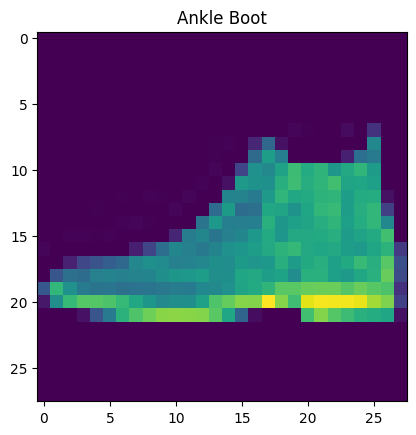

In [25]:
# X_test[index] will return (28,28) but we need (1,28,28). So, expand dims on 1'st dimension
sample=np.expand_dims(X_test[0], 0)
prediction=model.predict(sample)
#Out of (1,10) dims array, select the element index with highest probability using np.argmax()
index=np.argmax(prediction)
#Pas it to classes list to get the Textual label
label=classes[index]
#Visualize it
plt.imshow(X_test[0])
plt.title(label)
plt.show()

####Observation
With Changing the optimizer from 'SGD' to 'Adam', the model accuracy has improved